In [1]:
import pickle
import numpy as np
import pandas as pd
import os

from nsga_population import *
from typing import List
from individual import Individual

import matplotlib.pyplot as plt
import seaborn as sns
#["Experiment_1_2024-10-09_17_20_37_666716", "Experiment_1_2024-10-09_19_23_14_435359"]
#log_path = "..\\..\\logdata\\Experiment_1_2024-10-09_17_20_37_666716"
log_path = "..\\..\\logdata\\Experiment_1_2024-10-10_base"
os.path.exists(log_path)

True

Create a target folder for saving the figures

In [2]:
targ_dir = os.path.join(log_path, "Analysis")
if not os.path.exists(targ_dir):
    os.mkdir(targ_dir)

Import dataset

In [3]:
for cur_file in os.listdir(log_path):
    if cur_file[-4:] == ".csv":
        dataset_filename = cur_file

In [4]:
test_df = pd.read_csv(os.path.join(log_path, dataset_filename), index_col=False)

Performing data cleaning

Filter out the last iterations from the dataset

In [5]:
result_df = test_df[test_df["Iteration"] == test_df["Iteration"].max()].reset_index(drop=True)

Plotting the performance graph for the two objectives

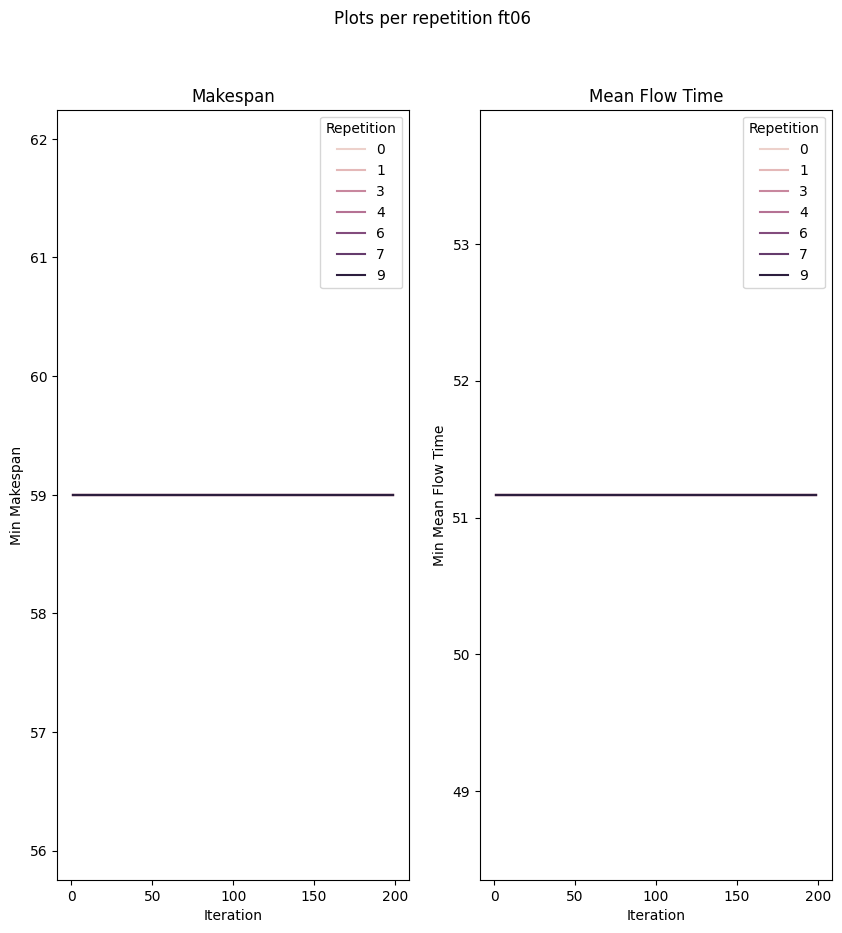

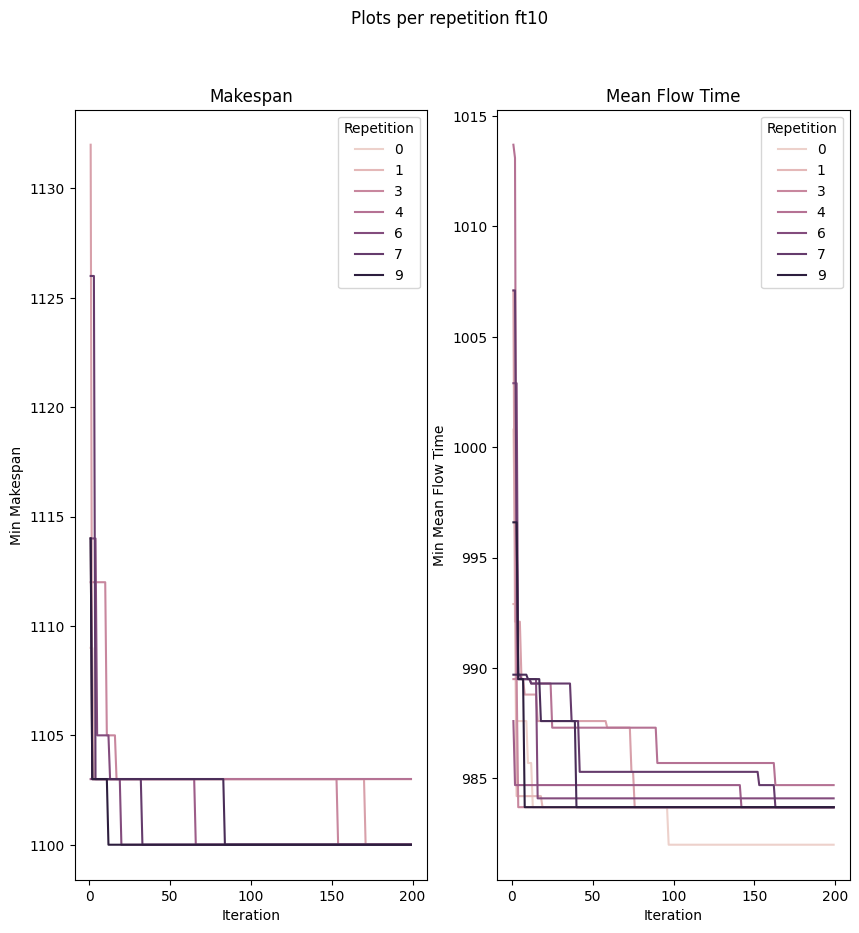

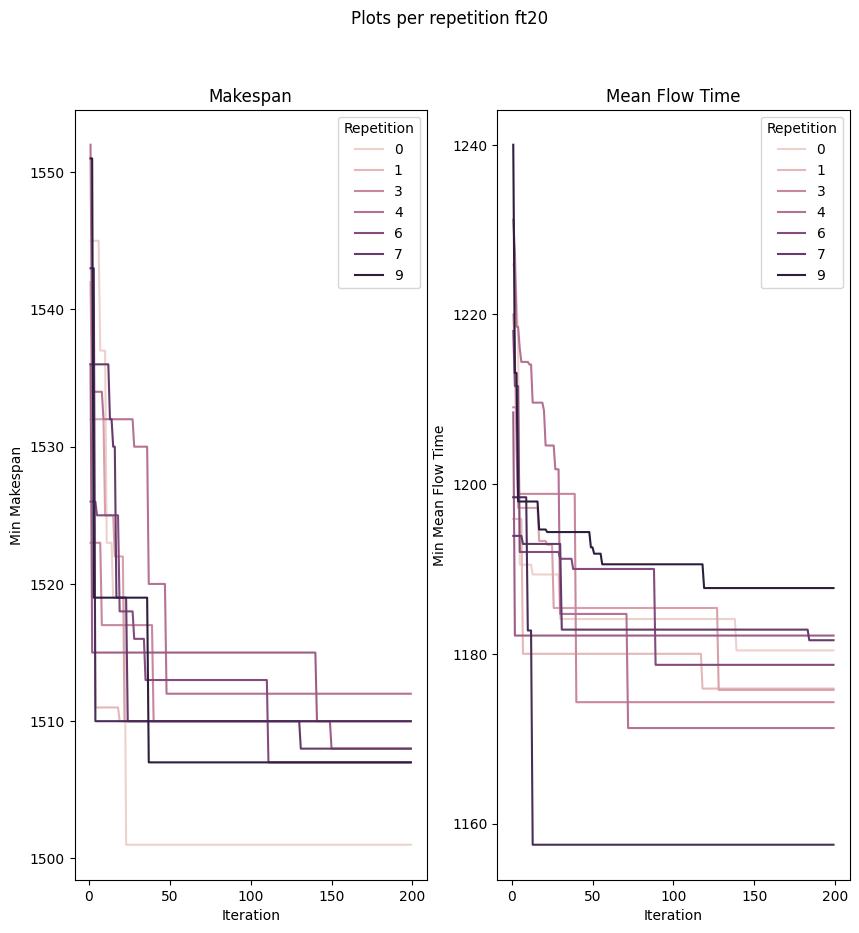

In [6]:
for problem in test_df["Problem"].unique():
    fig, ax = plt.subplots(1, 2, figsize=(10, 10))
    plt.suptitle(f"Plots per repetition {str(problem)}")
    ax[0].set_title("Makespan")
    ax[1].set_title("Mean Flow Time")
    sns.lineplot(data=test_df[test_df["Problem"] == problem], x="Iteration", y="Min Makespan", hue="Repetition", ax=ax[0])#, style="Candidate")
    sns.lineplot(data=test_df[test_df["Problem"] == problem], x="Iteration", y="Min Mean Flow Time", hue="Repetition", ax=ax[1])
    plt.show()

Aggregate over repetitions to get average values and standard deviations for each metric at each iteration.

In [7]:
agg_columns = ["Time", "Min Makespan", "Max Makespan", "Avg Makespan", "Min Mean Flow Time", "Max Mean Flow Time", "Avg Mean Flow Time", "Spread", "N Fronts"]
agg_columns = list(test_df.columns[4:])
avg_df = test_df.groupby(["Problem", "Candidate", "Iteration"]).agg({col_name : ["mean", np.std] for col_name in agg_columns})
avg_df

C:\Users\b-mor\AppData\Local\Temp\ipykernel_18100\4239381174.py:3: FutureWarning: The provided callable <function std at 0x00000227BF275940> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  avg_df = test_df.groupby(["Problem", "Candidate", "Iteration"]).agg({col_name : ["mean", np.std] for col_name in agg_columns})


Time           Min Makespan  \
                                              mean       std         mean   
Problem Candidate             Iteration                                     
ft06    quantum_base_encoding 1            0.03067  0.008420         59.0   
                              2            0.39236  0.053286         59.0   
                              3            0.75785  0.093163         59.0   
                              4            1.10448  0.102687         59.0   
                              5            1.45574  0.127531         59.0   
...                                            ...       ...          ...   
ft20    quantum_base_encoding 195        369.61801  5.354496       1508.3   
                              196        371.54096  5.424540       1508.3   
                              197        373.44238  5.482724       1508.3   
                              198        375.36114  5.527065       1508.3   
                              199        377.28274  5.548810       1508.3   

                                                  Max Makespan             \
                                              std         mean        std   
Problem Candidate             Iteration                                     
ft06    quantum_base_encoding 1          0.000000         59.0   0.000000   
                              2          0.000000         59.0   0.000000   
                              3          0.000000         59.0   0.000000   
                              4          0.000000         59.0   0.000000   
                              5          0.000000         59.0   0.000000   
...                                           ...          ...        ...   
ft20    quantum_base_encoding 195        3.020302       1537.6  26.433144   
                              196        3.020302       1537.6  26.433144   
                              197        3.020302       1537.6  26.433144   
                              198        3.020302       1537.6  26.433144   
                              199        3.020302       1537.6  26.433144   

                                        Avg Makespan             \
                                                mean        std   
Problem Candidate             Iteration                           
ft06    quantum_base_encoding 1            59.000000   0.000000   
                              2            59.000000   0.000000   
                              3            59.000000   0.000000   
                              4            59.000000   0.000000   
                              5            59.000000   0.000000   
...                                              ...        ...   
ft20    quantum_base_encoding 195        1523.163333  13.362602   
                              196        1523.163333  13.362602   
                              197        1523.163333  13.362602   
                              198        1523.163333  13.362602   
                              199        1523.163333  13.362602   

                                        Min Mean Flow Time            \
                                                      mean       std   
Problem Candidate             Iteration                                
ft06    quantum_base_encoding 1                  51.166667  0.000000   
                              2                  51.166667  0.000000   
                              3                  51.166667  0.000000   
                              4                  51.166667  0.000000   
                              5                  51.166667  0.000000   
...                                                    ...       ...   
ft20    quantum_base_encoding 195              1176.530000  8.157212   
                              196              1176.530000  8.157212   
                              197              1176.530000  8.157212   
                              198              1176.530000  8.157212   
             

Normalize values

In [18]:
selected_columns = ["Problem", "Min Makespan", "Max Makespan", "Avg Makespan", "Min Mean Flow Time", "Max Mean Flow Time", "Avg Mean Flow Time"]
avg_df.reset_index(drop=False)[selected_columns].groupby("Problem").apply(lambda x: print(x.shape))#(x - x.mean())/x.std())

(199, 13)
(199, 13)
(199, 13)


C:\Users\b-mor\AppData\Local\Temp\ipykernel_18100\2699713791.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  avg_df.reset_index(drop=False)[selected_columns].groupby("Problem").apply(lambda x: print(x.shape))#(x - x.mean())/x.std())
C:\Users\b-mor\AppData\Local\Temp\ipykernel_18100\2699713791.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_df.reset_index(drop=False)[selected_columns].groupby("Problem").apply(lambda x: print(x.shape))#(x - x.mean())/x.std())


""


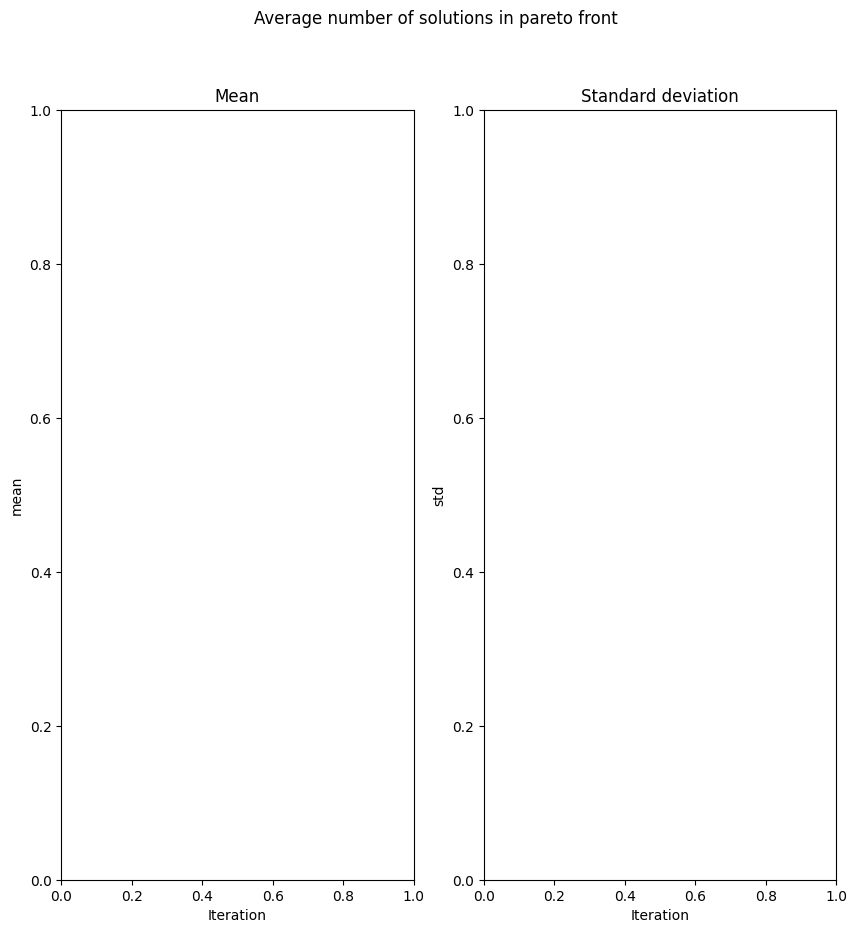

In [105]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Average number of solutions in pareto front")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["N Non-dominated solutions"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["N Non-dominated solutions"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Avg_n_solutions"))
plt.show()

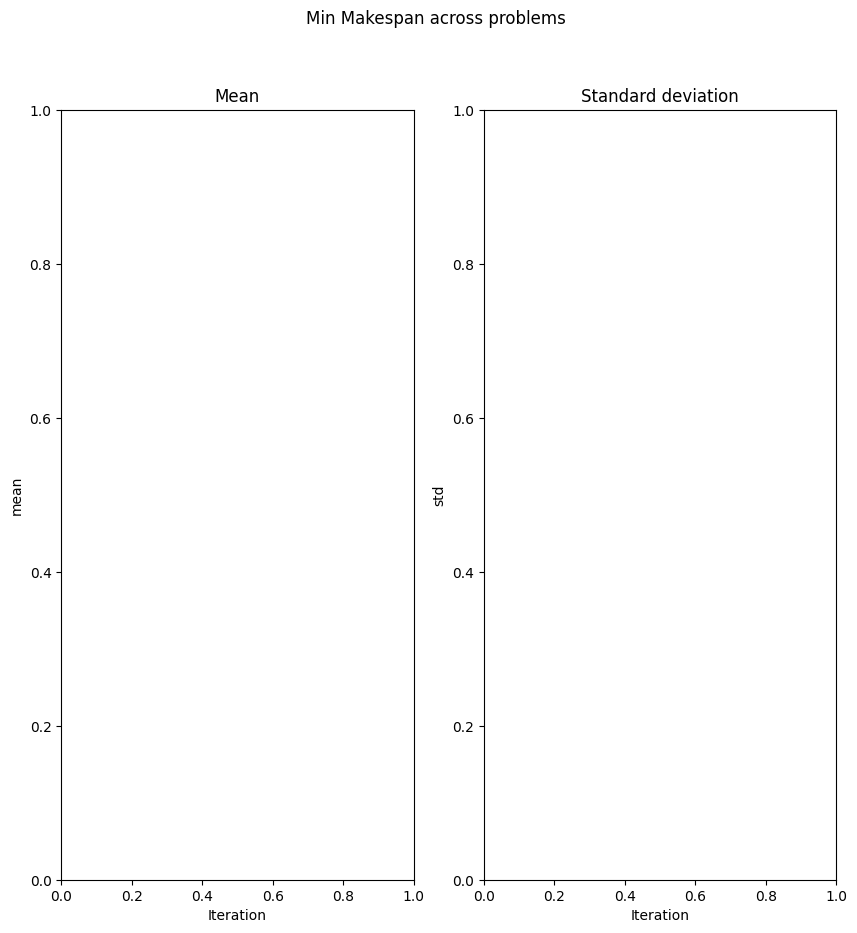

In [106]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Min Makespan across problems")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Min Makespan"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Min Makespan"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Min_Makespan"))
plt.show()
    

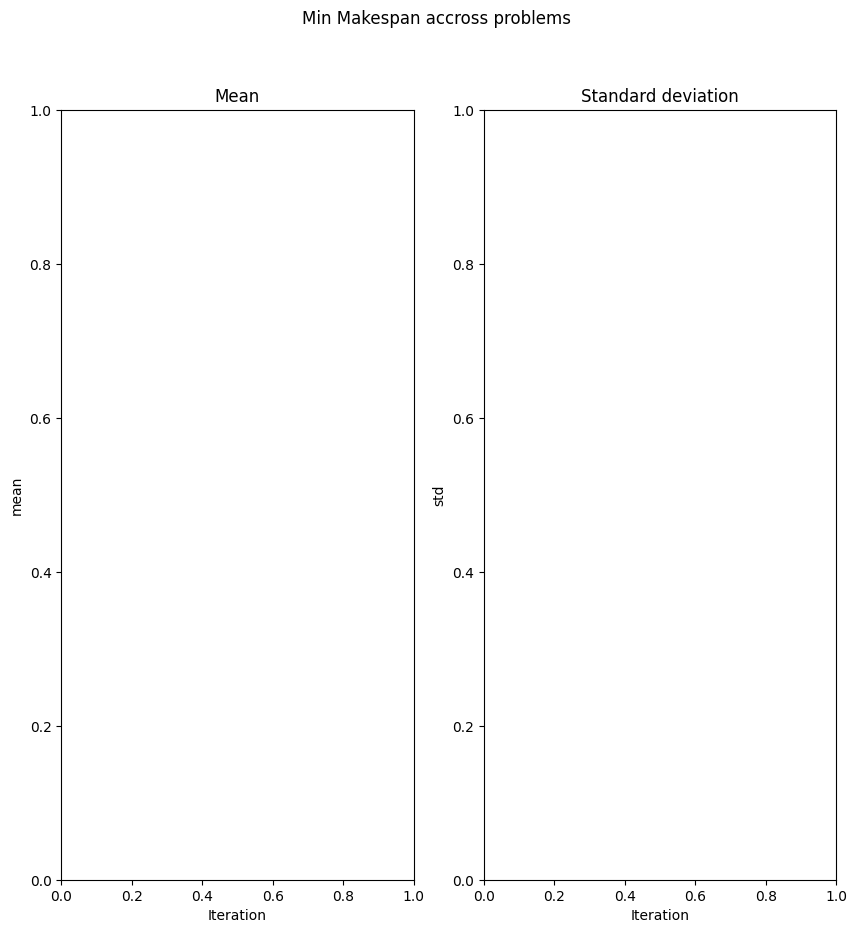

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Min Makespan accross problems")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Min Mean Flow Time"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Min Mean Flow Time"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Min_Mean_Flow_Time"))
plt.show()

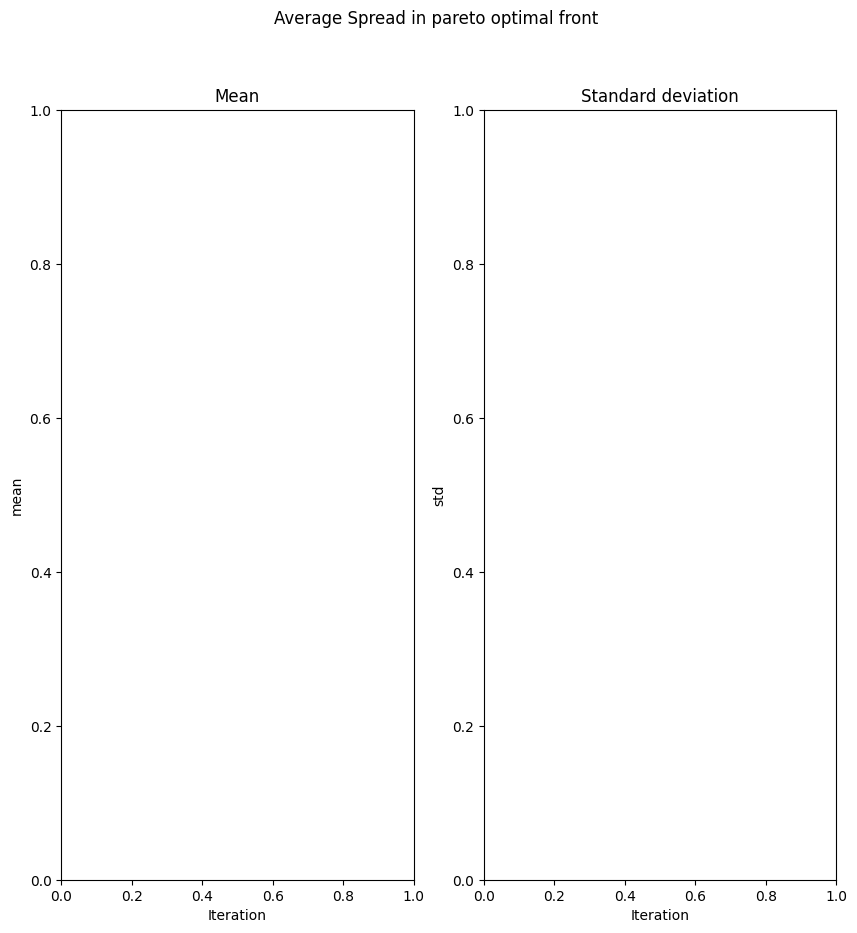

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Average Spread in pareto optimal front")
ax[0].set_title("Mean")
ax[1].set_title("Standard deviation")
sns.lineplot(data=avg_df["Spread"], x="Iteration", y="mean", hue="Problem", ax=ax[0])
sns.lineplot(data=avg_df["Spread"], x="Iteration", y="std", hue="Problem", ax=ax[1])
fig.savefig(os.path.join(targ_dir, "Spread"))
plt.show()

The average metrics for the final iterations

In [109]:
result_df = result_df.groupby(["Problem", "Candidate"]).agg({col_name : ["mean", "std"] for col_name in agg_columns})
result_df.to_csv(os.path.join(targ_dir, "result.csv"))

In [110]:
result_df

Empty DataFrame
Columns: [(Time, mean), (Time, std), (Min Makespan, mean), (Min Makespan, std), (Max Makespan, mean), (Max Makespan, std), (Avg Makespan, mean), (Avg Makespan, std), (Min Mean Flow Time, mean), (Min Mean Flow Time, std), (Max Mean Flow Time, mean), (Max Mean Flow Time, std), (Avg Mean Flow Time, mean), (Avg Mean Flow Time, std), (Spread, mean), (Spread, std), (N Fronts, mean), (N Fronts, std), (N Non-dominated solutions, mean), (N Non-dominated solutions, std)]
Index: []

In [111]:
test_df

,Problem,Candidate,Repetition,Iteration,Time,Min Makespan,Max Makespan,Avg Makespan,Min Mean Flow Time,Max Mean Flow Time,Avg Mean Flow Time,Spread,N Fronts,N Non-dominated solutions


Accessing the OR-library benchmarks

In [112]:
test_benchmark_collection = BenchmarkCollection(make_web_request=False)

In [113]:
cur_problem_names = test_df["Problem"].unique()
for p, v in test_benchmark_collection.benchmark_collection.items():
    if p in cur_problem_names:
        print(p, str(v["n_jobs"]) + " x " + str(v["n_machines"]))

In [114]:

for p, v in test_benchmark_collection.benchmark_collection.items():
    print(p, str(v["n_jobs"]) + " x " + str(v["n_machines"]))

abz5 10 x 10
abz6 10 x 10
abz7 20 x 15
abz8 20 x 15
abz9 20 x 15
ft06 6 x 6
ft10 10 x 10
ft20 20 x 5
la01 10 x 5
la02 10 x 5
la03 10 x 5
la04 10 x 5
la05 10 x 5
la06 15 x 5
la07 15 x 5
la08 15 x 5
la09 15 x 5
la10 15 x 5
la11 20 x 5
la12 20 x 5
la13 20 x 5
la14 20 x 5
la15 20 x 5
la16 10 x 10
la17 10 x 10
la18 10 x 10
la19 10 x 10
la20 10 x 10
la21 15 x 10
la22 15 x 10
la23 15 x 10
la24 15 x 10
la25 15 x 10
la26 20 x 10
la27 20 x 10
la28 20 x 10
la29 20 x 10
la30 20 x 10
la31 30 x 10
la32 30 x 10
la33 30 x 10
la34 30 x 10
la35 30 x 10
la36 15 x 15
la37 15 x 15
la38 15 x 15
la39 15 x 15
la40 15 x 15
orb01 10 x 10
orb02 10 x 10
orb03 10 x 10
orb04 10 x 10
orb05 10 x 10
orb06 10 x 10
orb07 10 x 10
orb08 10 x 10
orb09 10 x 10
orb10 10 x 10
swv01 20 x 10
swv02 20 x 10
swv03 20 x 10
swv04 20 x 10
swv05 20 x 10
swv06 20 x 15
swv07 20 x 15
swv08 20 x 15
swv09 20 x 15
swv10 20 x 15
swv11 50 x 10
swv12 50 x 10
swv13 50 x 10
swv14 50 x 10
swv15 50 x 10
swv16 50 x 10
swv17 50 x 10
swv18 50 x 10
sw

In [115]:
plt.cm.viridis(0.9)

(0.741388, 0.873449, 0.149561, 1.0)

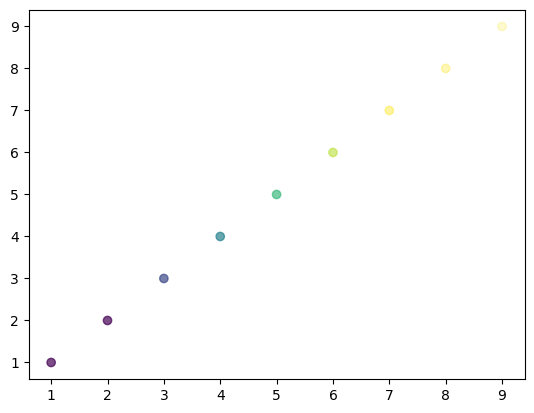

In [116]:
import matplotlib.pyplot as plt

test_x = [1,2,3,4,5,6,7,8,9]
test_y = [1,2,3,4,5,6,7,8,9]
colors = [plt.cm.viridis(((i-1)/len(test_x))*2) for i in range(len(test_x))]
for i in range(len(colors)):
    temp = list(colors[i])
    temp[-1] = np.min([1- (i-1)/(len(colors)), 0.7])
    colors[i] = temp
plt.scatter(test_x, test_y, c=colors)

In [117]:
"""with open("..\\..\\logdata\\Experiment_1_2024-09-27_12_08_01_037123\\population_dumps\\ft10_classical_0_9", "rb") as pop_dump:
    pop_obj = pickle.load(pop_dump)

N = 50
for i, start in enumerate(pop_obj.front_start_index):
    print("New front: " + str(i))
    cur_front = pop_obj.get_front_range(i)

    end = cur_front[1]
    if end > N:
        # limit the end and length of front
        x_list = np.empty(cur_front[-1]-N)
        y_list = np.empty(cur_front[-1]-N)
        end = N
    else:
        x_list = np.empty(cur_front[-1])
        y_list = np.empty(cur_front[-1])

    for j, ind in enumerate(pop_obj.R[cur_front[0] : end]):
        x, y = ind.cur_fitness
        x_list[j] = x
        y_list[j] = y

    index_sort = x_list.argsort()
    index_sort = np.flip(index_sort)
    y_list = y_list[index_sort]
    x_list = x_list[index_sort]
    #y_list.sort()
    print(x_list, y_list)
    plt.plot(x_list, y_list)
    plt.scatter(x_list, y_list)

        
plt.show()"""

'with open("..\\..\\logdata\\Experiment_1_2024-09-27_12_08_01_037123\\population_dumps\\ft10_classical_0_9", "rb") as pop_dump:\n    pop_obj = pickle.load(pop_dump)\n\nN = 50\nfor i, start in enumerate(pop_obj.front_start_index):\n    print("New front: " + str(i))\n    cur_front = pop_obj.get_front_range(i)\n\n    end = cur_front[1]\n    if end > N:\n        # limit the end and length of front\n        x_list = np.empty(cur_front[-1]-N)\n        y_list = np.empty(cur_front[-1]-N)\n        end = N\n    else:\n        x_list = np.empty(cur_front[-1])\n        y_list = np.empty(cur_front[-1])\n\n    for j, ind in enumerate(pop_obj.R[cur_front[0] : end]):\n        x, y = ind.cur_fitness\n        x_list[j] = x\n        y_list[j] = y\n\n    index_sort = x_list.argsort()\n    index_sort = np.flip(index_sort)\n    y_list = y_list[index_sort]\n    x_list = x_list[index_sort]\n    #y_list.sort()\n    print(x_list, y_list)\n    plt.plot(x_list, y_list)\n    plt.scatter(x_list, y_list)\n\n        